## Final Project Submission

Please fill out:
* Student name: Ann Maureen Wangui Ngina
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Introduction
Movie film production is quite diverse. Micrsoft need to venture into it and to advise in the best way we need to analyse the datasets provided. We will start by importing all the needed modules to be used for the analysis.

In [1]:
#Importing the various modules to use for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

We start by loading the first dataset which is title.basics.csv and checking for the different properties of the dataset.We check for the number of rows and column, we also check the data types of the columns in the dataframe as well as preview the first 10 rows of the dataset so as to understand the dataset more.

In [2]:
title_basics = pd.read_csv('title.basics.csv')
print(title_basics.shape)
print(title_basics.info())
title_basics.head(10)

(146144, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


The analysis above proves that we have some missing data on 3 columns which are original_title, runtime_minutes and genres. We will deal with the null values by dropping them as below:

In [3]:
title_basics = title_basics.dropna()
print(title_basics.shape)
print(title_basics.info())
title_basics

(112232, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


Further cleaning of the data we check for any duplicated values in the dataframe.

In [4]:
title_basics_dups= title_basics[title_basics.duplicated()]
title_basics_dups

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


We have enough proof that our dataset doesn't contain any duplicated values.

In [7]:
title_basics['runtime_minutes'].describe()

count    112232.000000
mean         86.261556
std         167.896646
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

<AxesSubplot:>

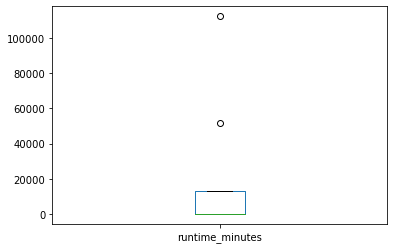

In [8]:
title_basics.describe()['runtime_minutes'].plot(kind = 'box')

We analyse our runtime_minutes column we identify points that we may assume to be outliers but from further research analysis I identified that the points were not outliers as we have films which are that long. We also note that we have a film that is as short as 1 minute and another one that is long as 51420 minutes.

In [12]:
genre_analysis= title_basics['genres'].value_counts().head(10)
genre_analysis

Documentary              24672
Drama                    15725
Comedy                    6413
Comedy,Drama              3163
Horror                    2975
Biography,Documentary     2052
Thriller                  1924
Drama,Romance             1806
Documentary,Drama         1515
Comedy,Drama,Romance      1451
Name: genres, dtype: int64

In [11]:
len(title_basics.groupby(['genres']))

1040

The above analysis shows the most produced genres. We will as well visualise this:

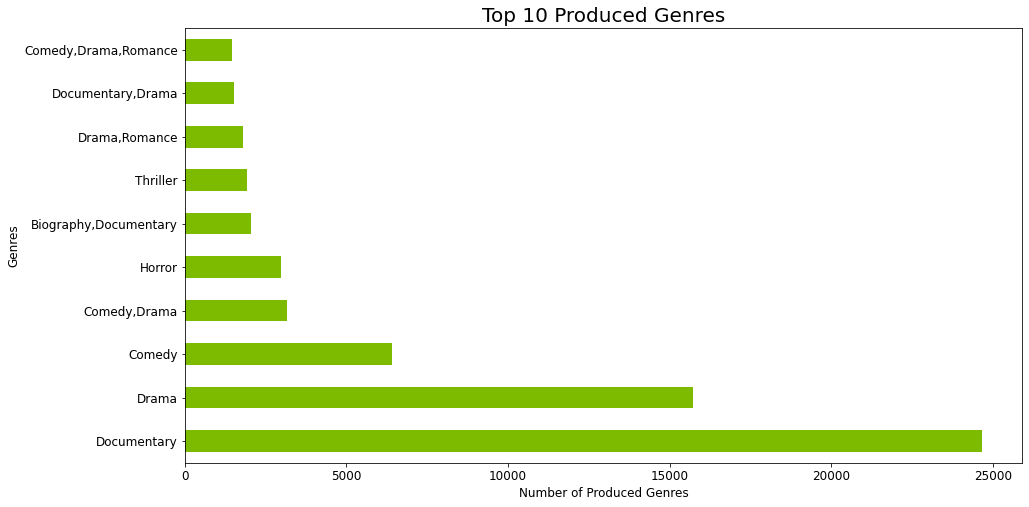

In [124]:
ax = genre_analysis.plot(kind = 'barh', figsize = (15,8), color = '#7cbb00', fontsize = 12)
ax.set_alpha(0.5)
ax.set_title('Top 10 Produced Genres', fontsize = 20)
ax.set_ylabel('Genres', fontsize = 12)
ax.set_xlabel('Number of Produced Genres', fontsize = 12)
plt.show()

We now load the second dataset to be used in the analysis.

In [15]:
title_ratings = pd.read_csv('title.ratings.csv')
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


We now check for the various characteristics of the dataframe at hand

In [16]:
title_ratings.shape

(73856, 3)

In [17]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
title_ratings_dups = title_ratings[title_ratings.duplicated()]
title_ratings_dups

,tconst,averagerating,numvotes


The above analysis shows that we have 0 null values as well as no dupblicated values.

To understand more of the data we have at hand, we now merge our loaded datasets, as they have a common column which is tconst

In [20]:
basics_ratings= pd.merge(title_basics, title_ratings, on = 'tconst', how = 'outer')
basics_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018.0,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
120363,tt9657910,NaN,NaN,NaN,NaN,NaN,5.0,7.0
120364,tt9668598,NaN,NaN,NaN,NaN,NaN,5.5,317.0
120365,tt9722952,NaN,NaN,NaN,NaN,NaN,7.0,6.0
120366,tt9783738,NaN,NaN,NaN,NaN,NaN,7.4,7.0


This dataframe allows us to check the relationship between the genres and the average rating.

In [125]:
genre_ratings = basics_ratings.groupby(['genres'])['averagerating'].mean().sort_values(ascending = False).head()
genre_ratings

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
Game-Show                     9.0
Documentary,News,Sport        8.8
Drama,Short                   8.8
Name: averagerating, dtype: float64

We now visualise the relationship between the ratings and the genres, and from this we will know the highly rated genres.

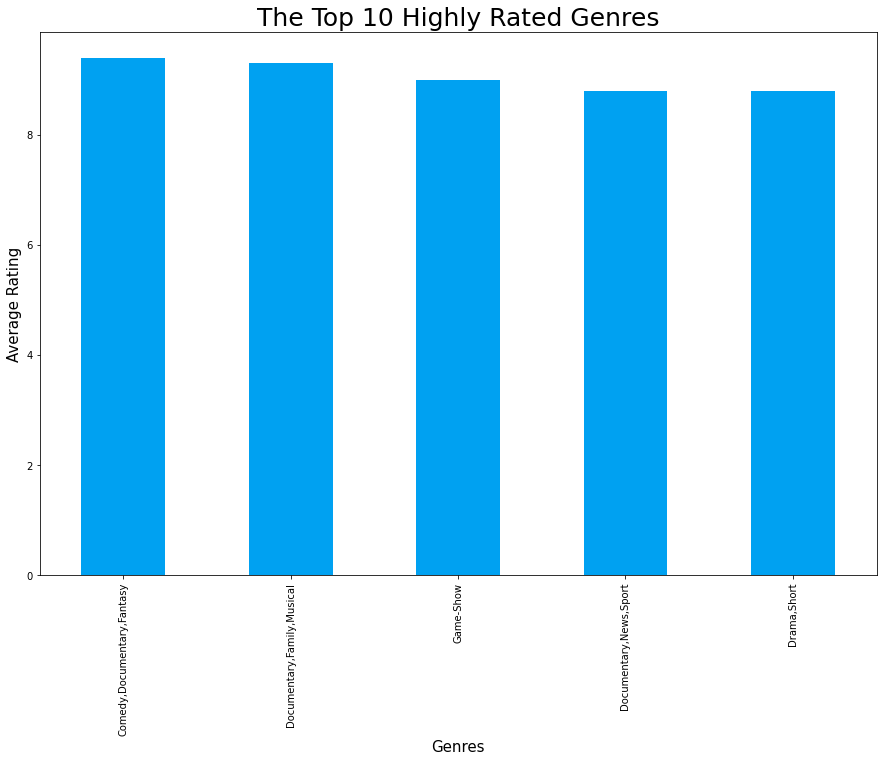

In [126]:
ax = genre_ratings.plot( kind = 'bar', color = '#00a1f1',figsize = (15,10))
ax.set_title ('The Top 10 Highly Rated Genres', fontsize = 25)
ax.set_ylabel('Average Rating',fontsize = 15)
ax.set_xlabel('Genres', fontsize = 15)
plt.show()

Loading of the thrird dataset

In [31]:
movie_gross = pd.read_csv('bom.movie_gross.csv')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [32]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data has some missing values and we also note that foreign gross is an object and we expect it to be float. We now go ahead and drop all the na in the data

In [33]:
movie_gross = movie_gross.dropna()
movie_gross.shape
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


We now convert the column foreign gross to a float number so that we can easily use it with mathematical operations.

In [ ]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','').astype(float)

In [38]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [ ]:
#We now create a new column which is total_gross
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

In [43]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [46]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
 5   total_gross     2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB


In [47]:
#Identifying the unique studios and the count of them
movie_gross['studio'].value_counts()

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
        ... 
TFC        1
Viv.       1
Zee        1
Icar.      1
JBG        1
Name: studio, Length: 172, dtype: int64

In [49]:
#grouping the data in terms of the studio column and finding the mean of the total gross so that we can identify 
#the studios that have the highest total gross income
studio_gross =movie_gross.groupby('studio')['total_gross'].mean().sort_values(ascending = False).head()
studio_gross

studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.249075e+08
GrtIndia    2.542000e+08
WB          2.368577e+08
Name: total_gross, dtype: float64

Text(0, 0.5, 'Total Gross')

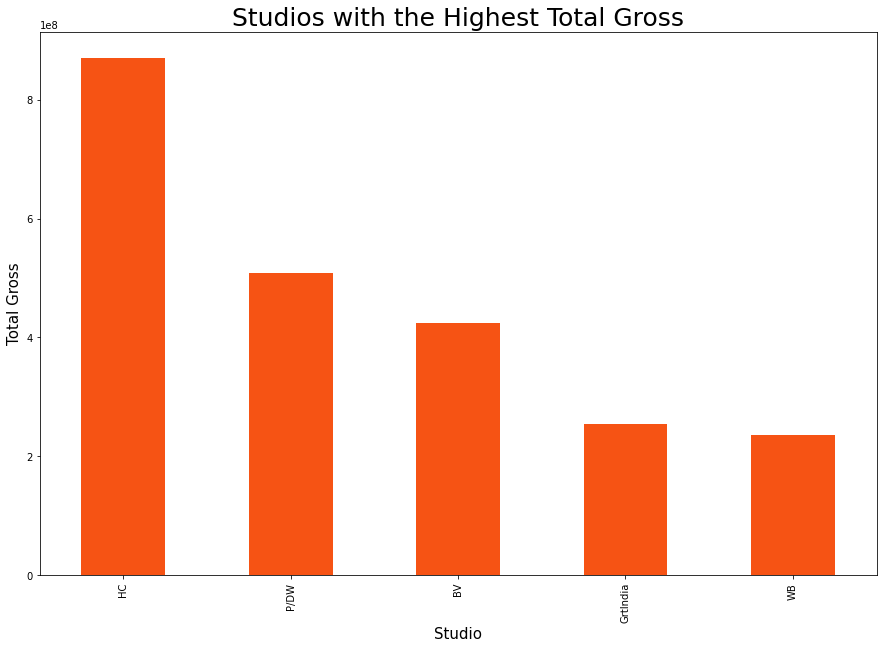

In [50]:
ax = studio_gross.plot(kind = 'bar',figsize = (15,10), color = '#f65314', width = 0.5)
ax.set_title('Studios with the Highest Total Gross', fontsize = 25)
ax.set_xlabel('Studio', fontsize = 15)
ax.set_ylabel('Total Gross', fontsize = 15)

Loading another dataset so as to draw insights from it

In [52]:
movie_budget = pd.read_csv('tn.movie_budgets.csv')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [53]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [54]:
movie_budget_dups = movie_budget[movie_budget.duplicated()]
movie_budget_dups

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


The dataset has no missing value or any duplicated value but we notice that some datatypes do not meet our expectations such as the production budget, domestic gross and worldwide gross as they are objects rather than numeric. We now work on the conversion of that.

In [55]:
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [56]:
movie_budget['domestic_gross']=movie_budget['domestic_gross'].str.replace(',','')\
.str.replace('$','').astype(float)

In [60]:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',','')\
.str.replace('$','').astype(float)

In [58]:
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',','')\
.str.replace('$','').astype(float)

In [61]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


We have converted the columns as needed we can now go ahead and manipulate the data.

In [62]:
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00


In [64]:
#We create a column that will help us know the profits for the different movies
movie_budget['profit'] = movie_budget['total_gross']- movie_budget['production_budget']
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03


In [65]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   profit             5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [71]:
best_movies = movie_budget.groupby('movie')['profit'].mean().sort_values(ascending = False).head()
best_movies

movie
Avatar                                  3.111853e+09
Star Wars Ep. VII: The Force Awakens    2.683973e+09
Titanic                                 2.667572e+09
Avengers: Infinity War                  2.426950e+09
Jurassic World                          2.086125e+09
Name: profit, dtype: float64

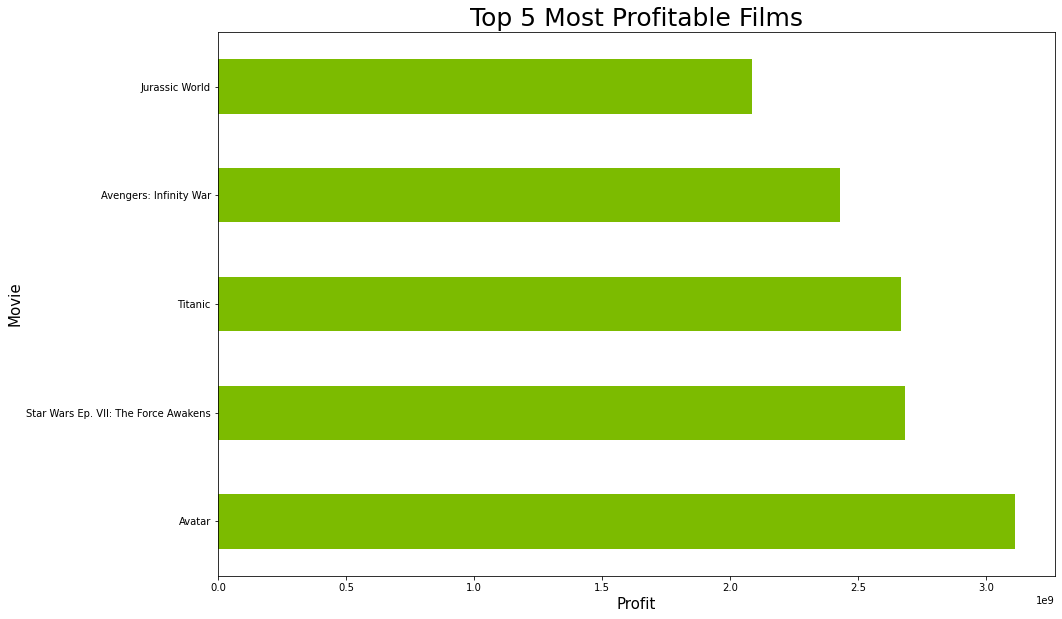

In [74]:
#We now plot the most profitable movies
ax = best_movies.plot(kind = 'barh', figsize = (15,10), color = '#7cbb00')
ax.set_title('Top 5 Most Profitable Films', fontsize = 25)
ax.set_xlabel('Profit', fontsize = 15)
ax.set_ylabel('Movie', fontsize = 15)
plt.show()

Loading another dataset to get insights from it

In [90]:
movies = pd.read_csv('tmdb.movies.csv', index_col=0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [91]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [92]:
movies_dups = movies[movies.duplicated()]
movies_dups

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


The dataset has no NA values but has 1020 duplicated values. We now drop the duplicated values:

In [93]:
movies.drop_duplicates()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [95]:
movies_basics= pd.merge(movies, title_basics, on = 'original_title', how = 'outer')
print(movies_basics.shape)
movies_basics

(126229, 14)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres
0,"[12, 14, 10751]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010.0,146.0,"Adventure,Fantasy,Mystery"
1,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,tt0892769,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation"
2,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi"
3,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,NaN,NaN,NaN,NaN,NaN
4,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126224,NaN,NaN,NaN,The Mystery of a Buryat Lama,NaN,NaN,NaN,NaN,NaN,tt9916132,The Mystery of a Buryat Lama,2018.0,94.0,"Biography,Documentary,History"
126225,NaN,NaN,NaN,O Ensaio,NaN,NaN,NaN,NaN,NaN,tt9916170,The Rehearsal,2019.0,51.0,Drama
126226,NaN,NaN,NaN,Illenau - die Geschichte einer ehemaligen Heil...,NaN,NaN,NaN,NaN,NaN,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017.0,84.0,Documentary
126227,NaN,NaN,NaN,Safeguard,NaN,NaN,NaN,NaN,NaN,tt9916190,Safeguard,2019.0,90.0,"Drama,Thriller"


In [96]:
movies_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126229 entries, 0 to 126228
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   genre_ids          30516 non-null   object 
 1   id                 30516 non-null   float64
 2   original_language  30516 non-null   object 
 3   original_title     126229 non-null  object 
 4   popularity         30516 non-null   float64
 5   release_date       30516 non-null   object 
 6   title              30516 non-null   object 
 7   vote_average       30516 non-null   float64
 8   vote_count         30516 non-null   float64
 9   tconst             115042 non-null  object 
 10  primary_title      115042 non-null  object 
 11  start_year         115042 non-null  float64
 12  runtime_minutes    115042 non-null  float64
 13  genres             115042 non-null  object 
dtypes: float64(6), object(8)
memory usage: 14.4+ MB


In [97]:
#After merging due to different lengths of the data we have lots of NA values, we go ahead and drop them.
movies_basics= movies_basics.dropna()
print(movies_basics.shape)
movies_basics

(19329, 14)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres
0,"[12, 14, 10751]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010.0,146.0,"Adventure,Fantasy,Mystery"
1,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,tt0892769,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation"
2,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi"
5,"[28, 878, 12]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
6,"[12, 14, 10751]",32657.0,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229.0,tt0814255,Percy Jackson & the Olympians: The Lightning T...,2010.0,118.0,"Adventure,Family,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30509,[27],502255.0,en,Closing Time,0.600,2018-02-24,Closing Time,0.0,1.0,tt8731118,Closing Time,2018.0,116.0,Documentary
30512,"[14, 28, 12]",381231.0,en,The Last One,0.600,2018-10-01,The Last One,0.0,1.0,tt2962488,The Last One,2014.0,80.0,"Documentary,History,News"
30513,"[14, 28, 12]",381231.0,en,The Last One,0.600,2018-10-01,The Last One,0.0,1.0,tt3118968,The Last One,2018.0,85.0,"Action,Adventure,Fantasy"
30514,"[10751, 12, 28]",366854.0,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1.0,tt3377456,Trailer Made,2016.0,79.0,Adventure


In [98]:
gen_pop= movies_basics.groupby('genres')['popularity'].mean().sort_values(ascending = False).head()
gen_pop

genres
Adventure,Fantasy,Mystery    33.533000
Family,Fantasy,Musical       29.247000
Action,Fantasy,War           23.680000
Action,Adventure,Sci-Fi      17.095908
Drama,Horror,Music           16.574000
Name: popularity, dtype: float64

Text(0, 0.5, 'Rating')

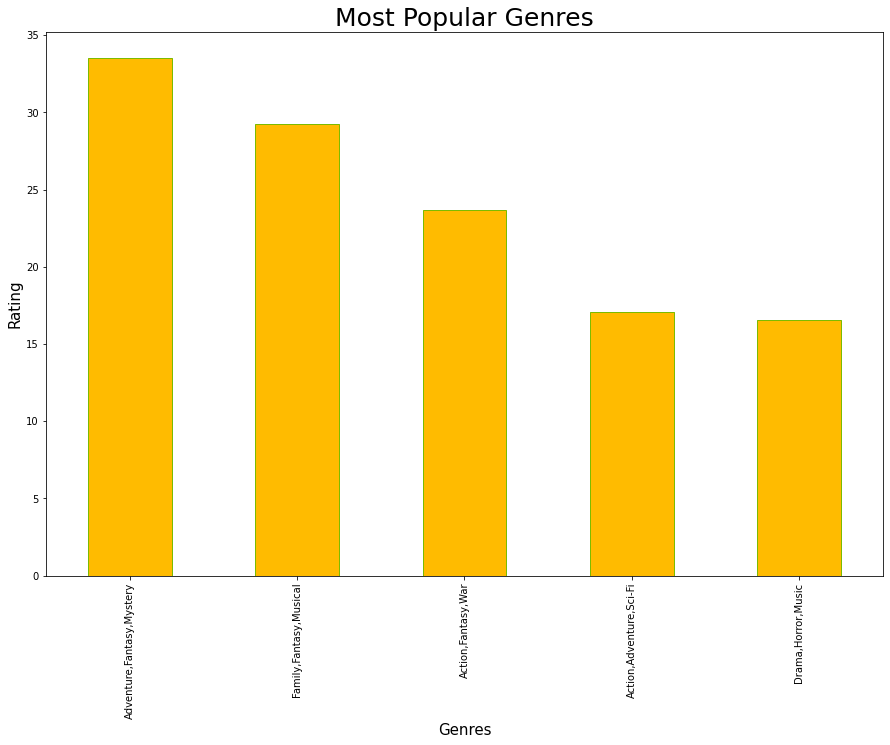

In [99]:
#plotting the above data to show the most popular genres
ax = gen_pop.plot(kind = 'bar', figsize = (15,10), title = 'Most Popular Genres', color = '#ffbb00', edgecolor = '#7cbb00')
ax.set_title('Most Popular Genres', fontsize = 25)
ax.set_xlabel('Genres',fontsize = 15)
ax.set_ylabel('Rating',fontsize = 15)

In [104]:
movie_info = pd.read_csv('rt.movie_info.tsv', sep = '\t', engine = 'python')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [117]:
ratings = movie_info['rating'].value_counts()
ratings

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

Text(0, 0.5, 'Number of Movies Produced')

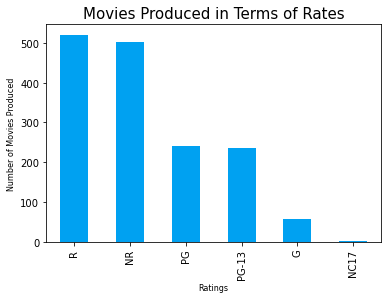

In [127]:
ax = ratings.plot(kind = 'bar', color = '#00a1f1')
ax.set_title('Movies Produced in Terms of Rates', fontsize = 15)
ax.set_xlabel('Ratings', fontsize = 8)
ax.set_ylabel('Number of Movies Produced', fontsize = 8)